# Predict Loan Eligibility for Dream Housing Finance company

ABC Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

Data Dictionary
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

* Variable	Description
* Loan_ID	Unique Loan ID
* Gender	Male/ Female
* Married	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* CoapplicantIncome	Coapplicant income
* LoanAmount	Loan amount in thousands
* Loan_Amount_Term	Term of loan in months
* Credit_History	credit history meets guidelines
* Property_Area	Urban/ Semi Urban/ Rural
* Loan_Status	(Target) Loan approved (Y/N)

Test file: CSV containing the customer information for whom loan eligibility is to be predicted

* Variable	Description
* Loan_ID	Unique Loan ID
* Gender	Male/ Female
* Married	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* CoapplicantIncome	Coapplicant income
* LoanAmount	Loan amount in thousands
* Loan_Amount_Term	Term of loan in months
* Credit_History	credit history meets guidelines
* Property_Area	Urban/ Semi Urban/ Rural

In [1]:
import pandas as pd
import numpy as np                   #for mathematical calculations
import seaborn as sns
import matplotlib.pyplot as plt             # for plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")    # to ignore any warnings

In [2]:
train = pd.read_csv("train.csv")        #Reading the dataset in a dataframe using Panda
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_original=train.copy()
test_original=test.copy()

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Object datatype represents those are categorical variables

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

We can look at summary of numerical fields by using describe() function

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

1. LoanAmount has (614 – 592) 22 missing values.
2. Loan_Amount_Term has (614 – 600) 14 missing values.
3. Credit_History has (614 – 564) 50 missing values.
4. We can also look that about 84% applicants have a credit_history. Because the mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
5. The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [9]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Distribution Analysis

Now, Let’s look at the histogram and boxplot of LoanAmount:

<AxesSubplot:>

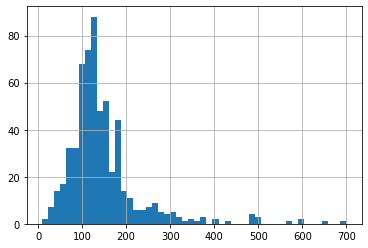

In [10]:
train['LoanAmount'].hist(bins=50)

<AxesSubplot:>

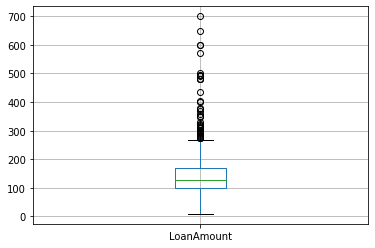

In [11]:
train.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. 

In [12]:
temp1 = train['Credit_History'].value_counts(ascending=True)
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

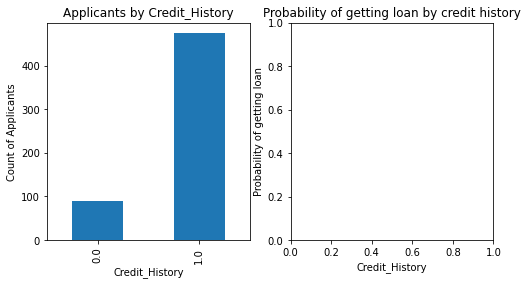

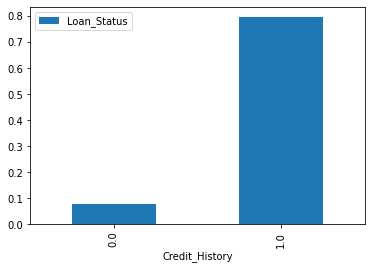

In [13]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

# Univariate Analysis : 
Analysing each variable individually. For categorical variables, we can use frequency table or bar plots. For numerical variables, we can use probability density plots.

Categorical Features: Gender, Married, SElf-Employed, Credit History, Loan_Status

Ordinal Features: (Order is involved): Dependents, Education, Property_Area

Numerical Features: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

## Target Variable
Loan_Status is the categorical variable. Lets see its frequency table, percentage distribution and bar plot.

In [14]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
train['Loan_Status'].value_counts(normalize='True')

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

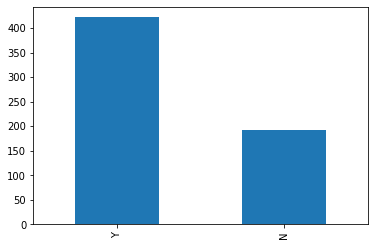

In [16]:
train['Loan_Status'].value_counts().plot.bar()

The loan of around 69% (422) people out of 614 was approved.

Let us visualize categorical and ornidal variables:

## Independent Variable(Categorical)

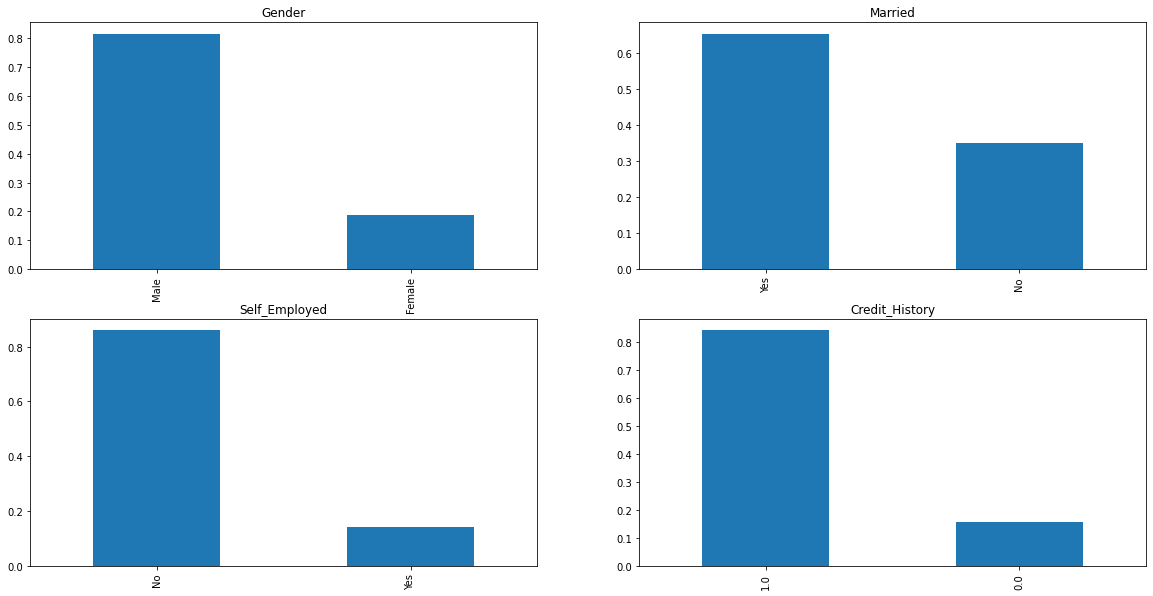

In [17]:
plt.subplot(221)
train['Gender'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Credit_History")
plt.show()

* 80% apllicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

## Independent Variable(Ordinal)

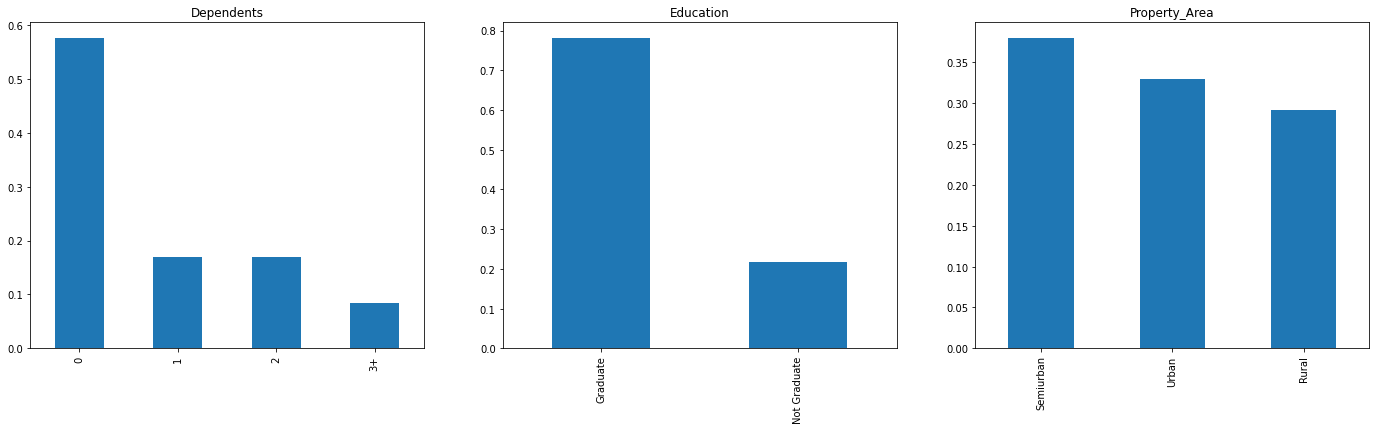

In [18]:
plt.subplot(131)
train['Dependents'].value_counts(normalize='True').plot.bar(figsize=(24,6),title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize='True').plot.bar(title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize='True').plot.bar(title='Property_Area')
plt.show()

Following inferences can be made from the above bar plots:
* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

## Independent Variable(Numerical)

We look at box plots to understand the distributions. Box plot for applicant income can be plotted by:

<AxesSubplot:>

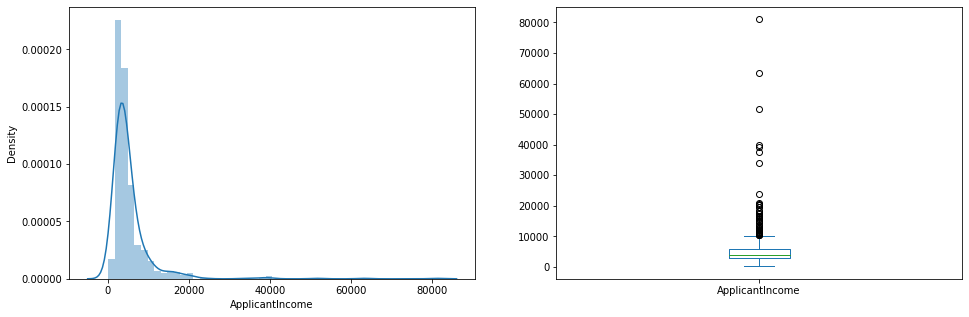

In [19]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

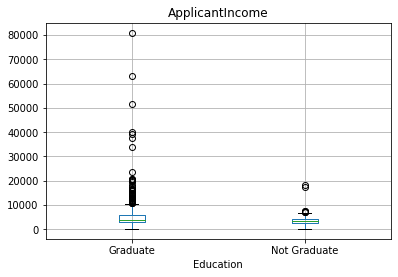

In [20]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

There is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let us look at the distribution of the CoApplicant income

<AxesSubplot:>

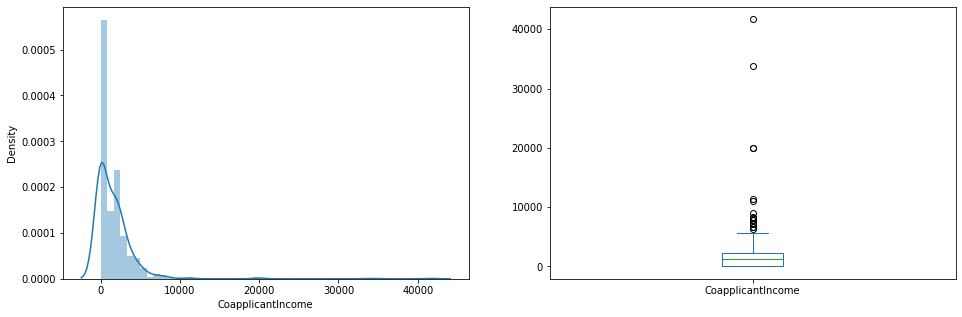

In [21]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))

Its a similar distribution like that of the applicant income. Majority of coapplicant's income ranges from 0 to 5000.  
Its not normally distributed and lot of outliers are there.

# Bivariate Analysis

We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

* Applicants having a credit history
* Applicants who repaid their previous debts
* Applicants with higher applicant and co-applicant incomes
* Loan approval should also depend on the loan amount. Lower the loan amount higher the chance of approval.
* Applicants with higher education level
* Properties in urban areas with high growth perspectives

We would like to see how well each feature correlate with Loan Status (Target variable). So, we look at bivariate analysis.

## Categorical independent variables vs Target variable

<AxesSubplot:xlabel='Gender'>

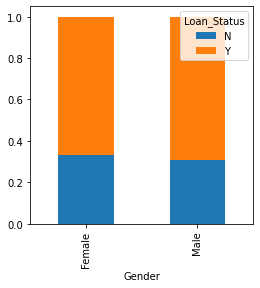

In [22]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

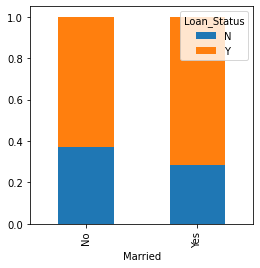

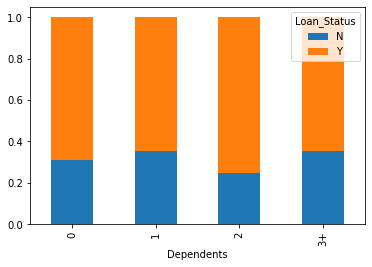

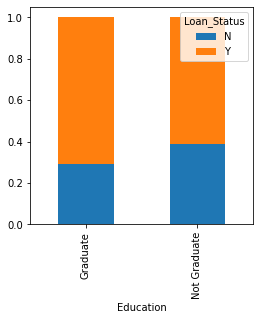

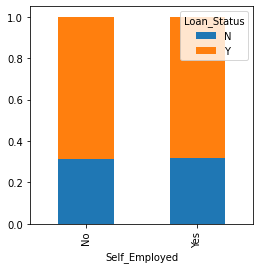

In [23]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

* Proportion of married applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

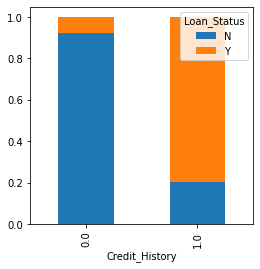

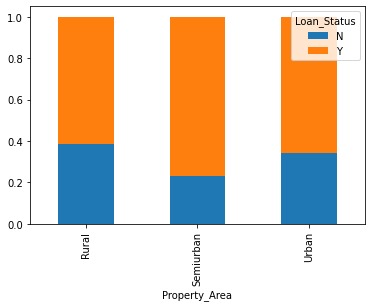

In [24]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

* Looks like people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

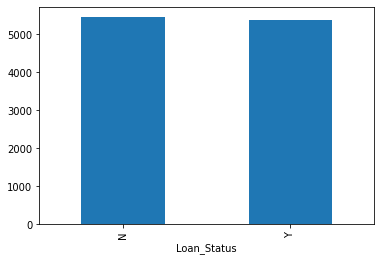

In [25]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We dont see any change in the mean income. So, lets make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

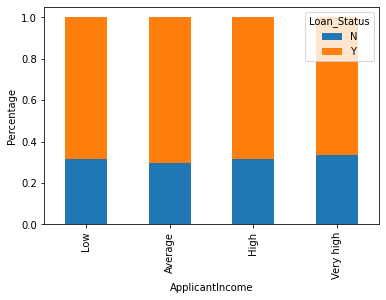

In [27]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

In [28]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

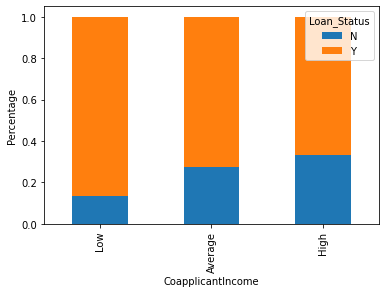

In [29]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It seems that if coapplicant's income is less the chances of loan approval are high. But this doesn't look right.The possible reason behind this may be
that most of the applicants don't have any coapplicant so coapplicant income is 0 for such applicants and then loan approval is not dependent on it.

**Let us look into the combined effect of Applicant and Coapplicant Incomes on the Loan Status.**

In [30]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [31]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

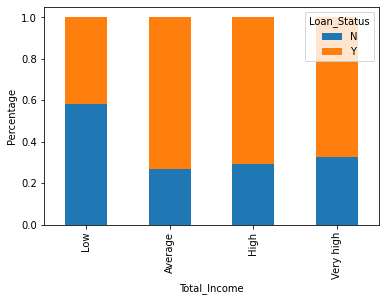

In [32]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see above that proportion of loans approves for applicants with low Total_Income is very low compared to that of applicants with average, high and very high income.

In [33]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

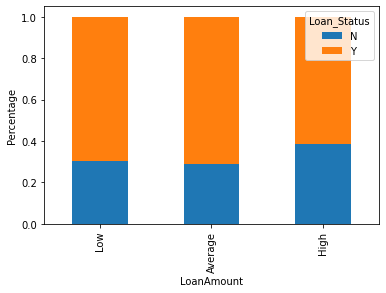

In [34]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

We see from above graph, the chances of loan approval is high when the loan amount is less. It supports our hypothesis.

Here we drop the bins we created earlier for exploration. We replace 3+ of dependents variable to 3 to make it numerical. We also change Loan_status 'Y' to 1 and 'N' to 0.
Reason is few models like logistic regression takes only numeric values as input.

In [35]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [36]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

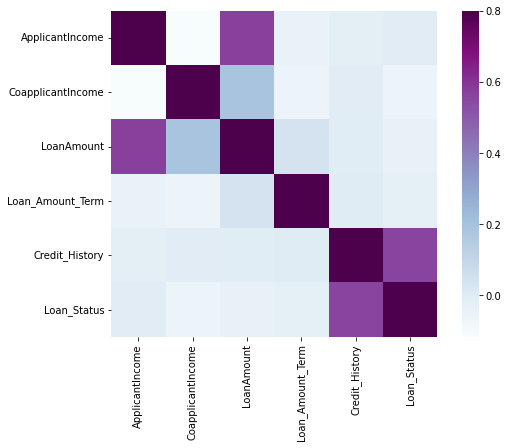

In [37]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True,cmap="BuPu");

We are using heat map to visualize the correlation. The darker color means those variables have more correlation.
For eg. There is more correlation between (ApplicantIncome and LoanAmount) and between (Credit_History and Loan_Status).
Also CoapplicantIncome has a correlation with LoanAmount.

# Missing Values and Outliers Treatment

In [38]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

To fill missing values we consider below methods:
1. For numerical variables: imputation using mean or median
2. For categorical variables: imputation using mode

In [39]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Checking the case of Loan_Amount_Term, to understand how the imputation using mode makes sense. 360 is the most repeated value, so we fill the null values with the same.

In [40]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Loan_Amount is a numerical variable, so we can use either mean or median to impute the missing values. But earlier we saw it has outliers so the mean will not be the right approach as it will be affected by the outliers.
So, we use median to impute the missing values in Loan_Amount variable.

In [42]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [43]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Due to the outliers, we see above in point # 2, the graph is right skewed. There is a long tail at the right end. 

We could remove that by taking the log transformation. So, we get a distribution which look closer to the normal distribution.

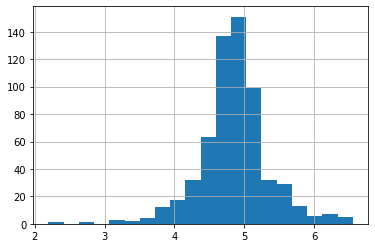

In [45]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [46]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [47]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [48]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [69]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
pred_cv = model.predict(x_cv)

In [54]:
accuracy_score(y_cv,pred_cv)

0.8540540540540541

In [55]:
pred_test = model.predict(test)

The cross_val_score calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

In [70]:
np.mean(cross_val_score(model, X,y, cv=5))

0.801306144208983

In [78]:
 np.mean(cross_val_score(DecisionTreeClassifier(criterion="gini",max_depth=2), X,y,cv=5))

0.8062108489937359

In [57]:
from sklearn.model_selection import StratifiedKFold

In [58]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


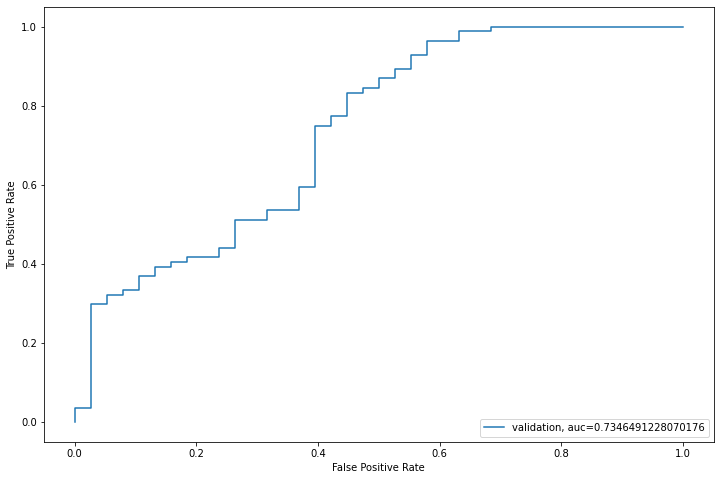

In [59]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()